In [1]:
from imports import *

plt.style.use('/home/rb/Documents/GitHub/antonym/code-def/style.mplstyle')

In [2]:
df = pd.read_csv(os.path.join(DATA_PATH,'diachronic-adjusted-pmi-with-scores.csv'))
dfbl = pd.read_csv(os.path.join(DATA_PATH,'training-diachronic-adjusted-pmi-with-scores.csv'))
dfbl['date'] = dfbl.date.str[:4].astype(int)

dfm = df.groupby(['date','ap']).npmi.mean().reset_index()
dfm = dfm[dfm.groupby("ap")['ap'].transform('size') > 10]

### Figure 1

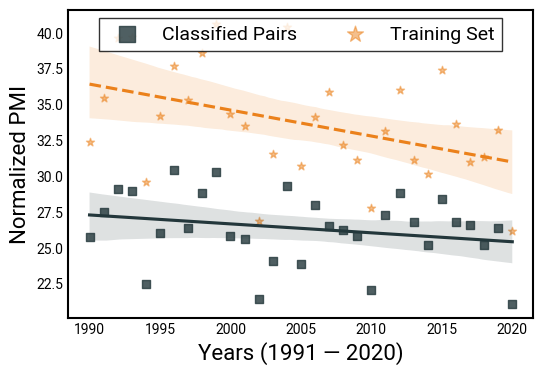

In [4]:
dat1 = df.groupby('date').npmi.mean().reset_index()
dat2 = dfbl.groupby('date').npmi.mean().reset_index()

f, a = plt.subplots(figsize=(6,4))
sns.regplot(x="date", y="npmi", data=dat1,color=PRIM_DARK,ax=a,marker='s',label='Classified Pairs')
sns.regplot(x="date", y="npmi", data=dat2,color=PRIM_LIGHT,ax=a,marker='*',label='Training Set',line_kws={"ls":'--'},scatter_kws={"zorder":-1,"alpha":.5})

a.set_xlabel('Years (1991 — 2020)')
a.set_ylabel('Normalized PMI')
leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.005),ncol=2,fontsize=14,markerscale=2)

plt.savefig('../figs/fig1.pdf',bbox_inches='tight',dpi=400, transparent=True)
plt.show()

### Fig 3 - Most High-Scoring

In [6]:
scores = df[['ap','score']].drop_duplicates()
scores = dict(zip(scores.ap,scores.score))

In [17]:
def plot_smooth_lines(dfm, target_list, subplot_dim, figsize, degree=5):
    def fit_smooth_line(y_values):
        x_values = np.arange(len(y_values))
        coefficients = np.polyfit(x_values, y_values, degree)
        poly_function = np.poly1d(coefficients)
        return poly_function(x_values)

    nrows, ncols = subplot_dim
    f, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=figsize)

    for ax, (ap, aptrans, class_type) in zip(axs.flatten(), target_list):
        d = dfm[dfm.ap == ap.replace('—', '-')]
        x, y = d.date, d.npmi.to_numpy()

        alpha_scatter = 0.25 if class_type else 0.1
        alpha_line = 1 if class_type else 0.3
        color_title = PRIM_DARK if class_type else 'lightgrey'

        ax.scatter(x, y, color=PRIM_DARK, alpha=alpha_scatter, edgecolors='none')
        ax.plot(x, fit_smooth_line(y), color=PRIM_DARK, alpha=alpha_line,path_effects=[pe.Stroke(linewidth=2.5, foreground='white'), pe.Normal()])

        ax.set_title(aptrans.replace('—', ' — '), y=.9, fontsize=10, color=color_title)

        ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

        ax.set_xlim(d.date.min(), d.date.max())

    f.text(0.5, 0.04, 'Years (1991 — 2020)', ha='center')
    f.text(0.06, 0.5, 'Adjusted PMI', va='center', rotation='vertical')
    plt.show()

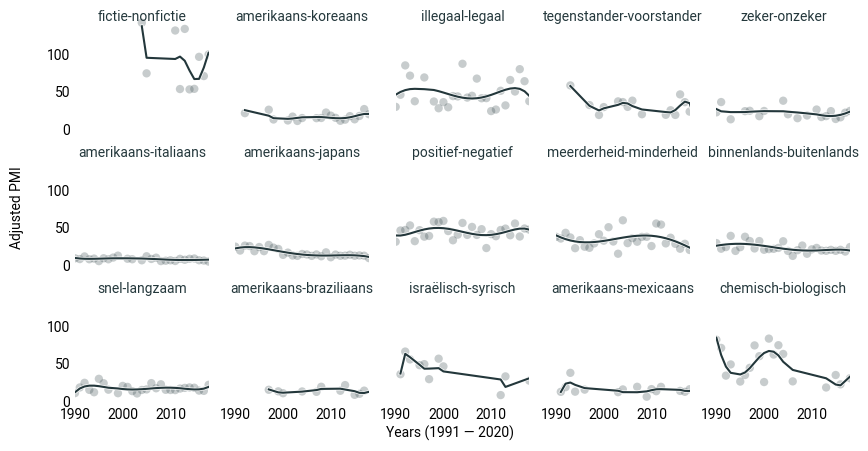

<Figure size 640x480 with 0 Axes>

In [19]:
# high_scoring = Counter({ap:s for ap,s in scores.items() if ap in dfm.ap.unique()}).most_common(15)
# high_scoring = list(dict(high_scoring).keys())
# plot_smooth_lines(dfm = dfm, 
#                   target_list = [(hs, hs, True) for hs in high_scoring], 
#                   subplot_dim = (3,5), 
#                   figsize = (10,5))

# plt.savefig('../figs/fig3.pdf')

### Fig 4: Declining

In [32]:
# dfm = df[df.score > .95].groupby(['date','ap']).npmi.mean().reset_index()
# dfm = dfm[dfm.groupby("ap")['ap'].transform('size') > 10]
# slopes = {ap:pmk(d.sort_values('date').npmi.to_numpy()) for ap,d in dfm.groupby('ap')}
# slopes_declining = Counter({w:s.p for w,s in dict(slopes).items() if s.slope < 0 and s.p < .01}).most_common()[-15:]
# print(list(dict(slopes_declining).keys()))

In [20]:
slopes_declining = [
    ('katholiek—protestants', 'catholic—protestant', True),
    ('belasting—premie', 'tax—premium', False),
    ('geestelijk—lichamelijk', 'spiritual—physical', True),
    ('leven—dood', 'life—death', True),
    ('algemeen—bijzonder', 'general—special', True),
    ('economisch—sociaal', 'economic—social', False),
    ('lang—kort', 'long—short', True),
    ('televisie—radio', 'television—radio', True),
    ('twee—één', 'two—one', True),
    ('zwart—blank', 'black—white', True),
    ('vrouw—man', 'female—male', True),
    ('amerikaans—israëlisch', 'american—israeli', True),
    ('snel—tempo', 'fast—pace', False),
    ('amerikaans—japans', 'american—japanese', True),
    ('werkgever—werknemer', 'employer—employee', True)
]

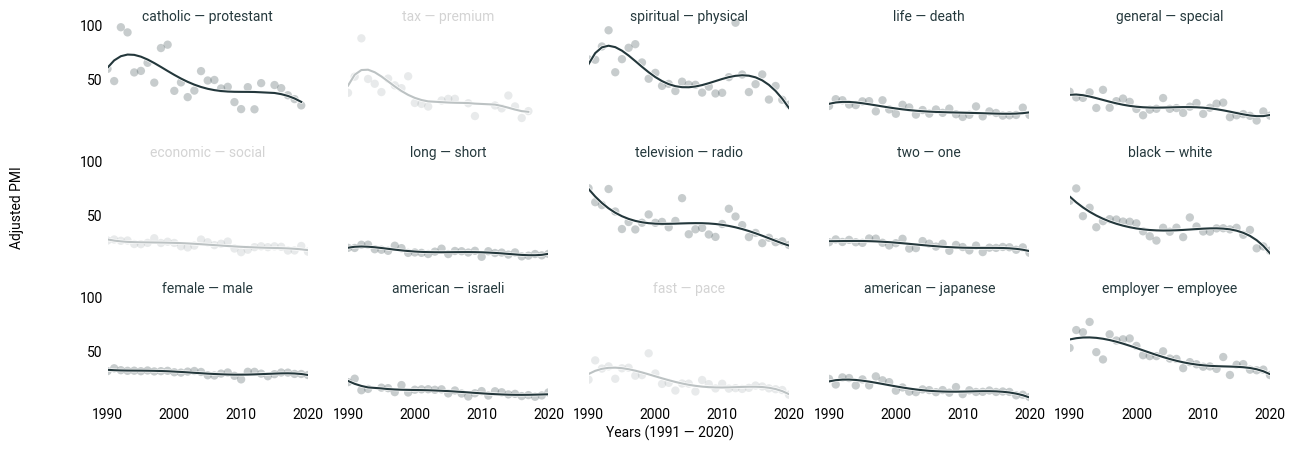

<Figure size 640x480 with 0 Axes>

In [22]:
plot_smooth_lines(dfm = dfm, 
                  target_list = slopes_declining, 
                  subplot_dim = (3,5), 
                  figsize = (15,5))

plt.savefig('../figs/fig4.pdf')

## Fig 5

In [33]:
# slopes_increasing = Counter({w:s.p for w,s in dict(slopes).items() if s.slope > 0}).most_common(15)
# print(list(dict(slopes_increasing).keys()))

In [23]:
slopes_increasing = [
    ('jong—ziek', 'young—sick', False),
    ('politie—burger', 'police—citizen', True),
    ('uiteindelijk—aanvankelijk', 'eventually—initially', True),
    ('school—ziekenhuis', 'school—hospital', True),
    ('los—vast', 'loose—tight', True),
    ('ver—dicht', 'far—close', True),
    ('amerikaans—braziliaans', 'american—brazilian', True),
    ('muziek—beeldend', 'music—visual', False),
    ('schrijver—schilder', 'writer—painter', False),
    ('president—vicepresident', 'president—vice president', False),
    ('ver—precies', 'far—precise', False),
    ('baby—ouder', 'baby—parent', True),
    ('zwart—grijs', 'black—grey', False),
    ('wedstrijd—rust', 'competition—rest', False),
    ('eigen—collectief', 'own—collective', True)
]

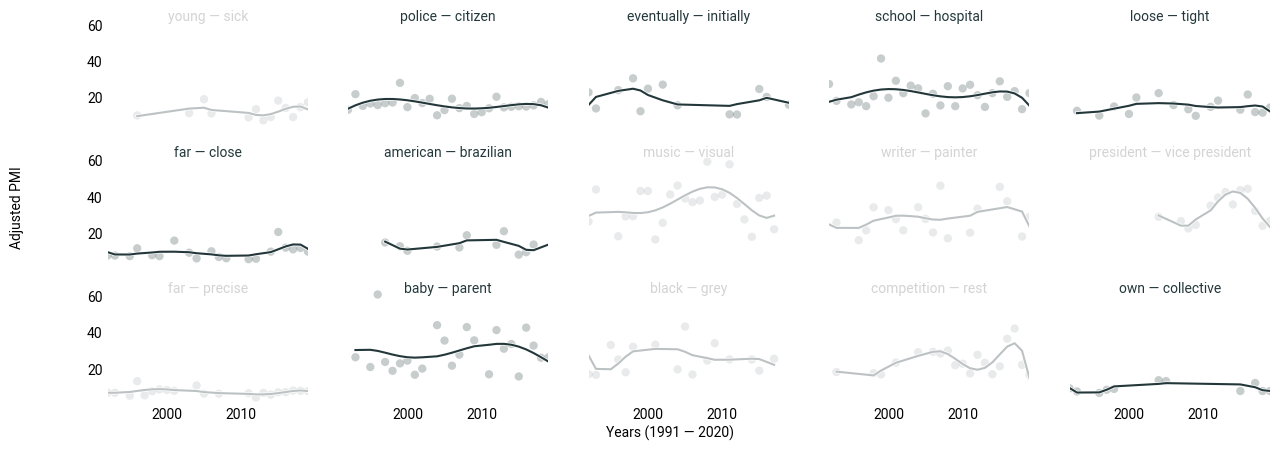

<Figure size 640x480 with 0 Axes>

In [24]:
plot_smooth_lines(dfm = dfm, 
                  target_list = slopes_increasing, 
                  subplot_dim = (3,5), 
                  figsize = (15,5))

plt.savefig('../figs/fig5.pdf')

In [25]:
scaler = MinMaxScaler()

def corr_ts(pair):
    t = df[df.ap == pair]
    tpmi = t.groupby('date').npmi.mean().reset_index()
    tpa = t.groupby('date').pa.sum().reset_index()
    tpb = t.groupby('date').pb.sum().reset_index()
    ts = pd.DataFrame([tpmi.npmi,tpa.pa,tpb.pb]).T.set_index(tpmi.date)
    if len(ts) < 10:
        return
    ts = ts.apply(zscore)
    return ts.corr().to_dict()

def plot_ts(pair):
    t = df[df.ap == pair]
    tpmi = t.groupby('date').npmi.mean().reset_index()
    tpa = t.groupby('date').pa.sum().reset_index()
    tpb = t.groupby('date').pb.sum().reset_index()
    ts = pd.DataFrame([tpmi.npmi,tpa.pa,tpb.pb]).T.set_index(tpmi.date)
    ts.columns= [f'PMI(w1,w2)',f'P(w1)',f'P(w2)']
    ts = pd.DataFrame(scaler.fit_transform(ts),index=ts.index,columns=ts.columns)
    return ts

In [26]:
# ccf = {ap:corr_ts(ap) for ap in df.ap.unique()}
# ccf = {k:v for k,v in ccf.items() if v}
# cdf = pd.DataFrame([{"w":k,"ccf":v['pa']['npmi']} for k,v in ccf.items()]).dropna()

In [29]:
pairs = [('vrouw-man','woman-man'),('eigen-ander','own-other'),('zwart-wit','black-white'),('rechts-links','right-left')]

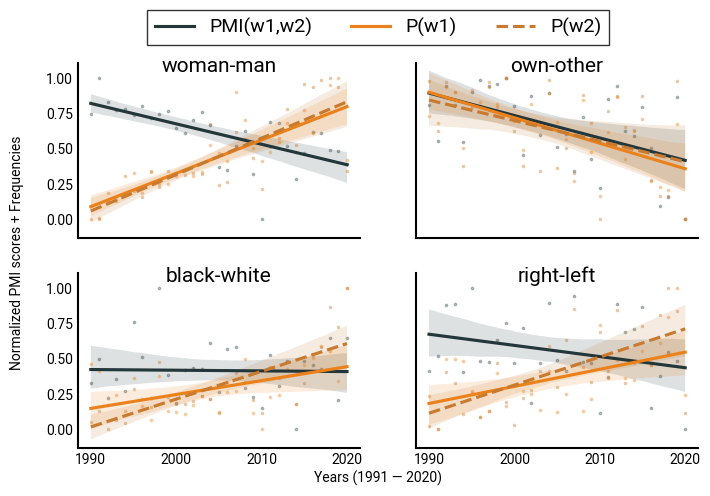

In [32]:
fig, ax = plt.subplots(2,2,figsize=(8,5),sharex=True,sharey=True)

colors = {'PMI(w1,w2)':PRIM_DARK, 'P(w1)':PRIM_LIGHT, 'P(w2)':SEC_LIGHT}
styles = {'PMI(w1,w2)':None, 'P(w1)':None, 'P(w2)':"--"}

for c,(pair,trans_) in enumerate(pairs):
    d = plot_ts(pair).reset_index()

    for col in list(d.columns)[1:]:
        sns.regplot(data=d,
                    x='date',
                    y=col,
                    ax=ax.flatten()[c],
                    line_kws={"ls":styles[col]},
                    label=col,
                    color=colors[col],
                    marker='o' if '(w2' not in col else 's',
                    scatter_kws={'alpha':0.3,'s':3})
    ax.flatten()[c].set_xlabel('')
    ax.flatten()[c].set_ylabel('')
    ax.flatten()[c].set_title(trans_.replace('—',' — '),y=.9,fontsize=15,color='black')
    ax.flatten()[c].spines[['right', 'top']].set_visible(False)

fig.text(0.5, 0.04, 'Years (1991 — 2020)', ha='center')
fig.text(0.04, 0.5, 'Normalized PMI scores + Frequencies', va='center', rotation='vertical')

handles, labels = ax.flatten()[c].get_legend_handles_labels()
lines = ax.flatten()[c].lines
leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.005),ncol=3)


plt.savefig('../figs/fig6.pdf',bbox_inches='tight',dpi=400, transparent=True)
plt.show()

# Corr. Table

In [3]:
def get_slopes(df):
    return {col + '_slope':lr(np.arange(len(df)),df[col]).slope for col in df.columns}

r = []
for p,g in df.groupby('ap'):
    gg = g.groupby('date').agg({'pa':'sum','pb':'sum','npmi':'mean'})
    if len(gg) < 10:
        continue
    rd = get_slopes(gg)
    cd = gg.corr().to_dict()
    for i,j in [('npmi','pa'),('npmi','pb'),('pb','pa')]:
        rd[i + '_' + j] = cd[i][j]
    rd['ap'] = p
    r.append(rd)
rd = pd.DataFrame(r).dropna()

In [38]:
rd['u_npmi-p'] = rd[['npmi_pa','npmi_pb']].mean(axis=1)
rdt = rd.sort_values('u_npmi-p').head(5).set_index('ap')

In [5]:
rd[(rd.pa_slope > 0) & (rd.pb_slope > 0) & (rd.npmi_slope < 0)].sort_values('u_npmi-p').head(15)

,pa_slope,pb_slope,npmi_slope,npmi_pa,npmi_pb,pb_pa,ap,u_npmi-p
886,0.000721,0.000495,-0.148592,-0.492376,-0.292514,0.889701,vrouw-man,-0.392445
409,0.000285,0.000098,-0.212170,0.025650,0.078410,0.918637,kind-vader,0.052030
701,0.000076,0.000096,-0.257623,0.061354,0.206810,0.730579,rechts-links,0.134082
694,0.000009,0.000115,-0.305761,0.338390,0.056552,0.093148,provincie-gemeente,0.197471
732,0.000148,0.000139,-0.181666,0.216506,0.219228,0.650263,russisch-chinees,0.217867
490,0.000207,0.000214,-0.206069,0.293297,0.153339,0.792264,man-kind,0.223318
728,0.000051,0.000120,-0.343471,0.383818,0.175082,0.693166,rood-wit,0.279450
647,0.000077,0.000017,-0.499519,0.134522,0.439748,0.778450,patiënt-arts,0.287135
406,0.000317,0.000156,-0.259457,0.357070,0.222701,0.934777,kind-ouder,0.289885
280,0.000050,0.000022,-0.893006,0.085882,0.514800,0.513316,grieks-turks,0.300341


In [51]:
pairs = [('meisje-jongen','girl-boy'),('provincie-gemeente','province-municipality'),('zwart-wit','black-white'),('rechts-links','right-left')]

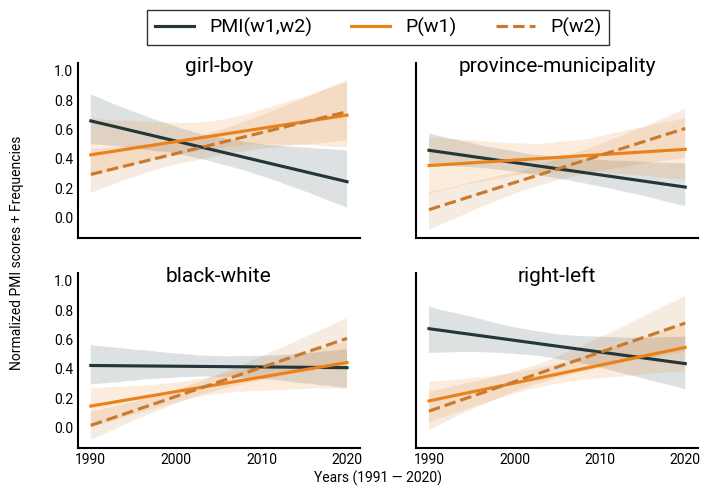

In [53]:
fig, ax = plt.subplots(2,2,figsize=(8,5),sharex=True,sharey=True)

colors = {'PMI(w1,w2)':PRIM_DARK, 'P(w1)':PRIM_LIGHT, 'P(w2)':SEC_LIGHT}
styles = {'PMI(w1,w2)':None, 'P(w1)':None, 'P(w2)':"--"}

for c,(pair,trans_) in enumerate(pairs):
    d = plot_ts(pair).reset_index()

    for col in list(d.columns)[1:]:
        sns.regplot(data=d,
                    x='date',
                    y=col,
                    ax=ax.flatten()[c],
                    line_kws={"ls":styles[col]},
                    label=col,
                    color=colors[col],
                    marker='o' if '(w2' not in col else 's',
                    scatter_kws={'alpha':0,'s':3})
    ax.flatten()[c].set_xlabel('')
    ax.flatten()[c].set_ylabel('')
    ax.flatten()[c].set_title(trans_.replace('—',' — '),y=.9,fontsize=15,color='black')
    ax.flatten()[c].spines[['right', 'top']].set_visible(False)

fig.text(0.5, 0.04, 'Years (1991 — 2020)', ha='center')
fig.text(0.04, 0.5, 'Normalized PMI scores + Frequencies', va='center', rotation='vertical')

handles, labels = ax.flatten()[c].get_legend_handles_labels()
lines = ax.flatten()[c].lines
leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.005),ncol=3)

In [41]:
rd

,pa_slope,pb_slope,npmi_slope,npmi_pa,npmi_pb,pb_pa,ap,u_npmi-p
0,-0.000029,-0.000101,-0.369272,0.859941,0.948230,0.862161,aanbod-vraag,0.904086
1,-0.000062,-0.000127,-1.595074,0.791878,0.892983,0.759149,aandeelhouder-directie,0.842431
2,-0.000016,-0.000173,-0.697351,0.941902,0.959487,0.963488,aanhanger-leider,0.950695
3,-0.000030,-0.000035,-1.835786,0.783432,0.935860,0.832390,aanval-verdediging,0.859646
4,-0.000011,-0.000017,-1.003530,0.749989,0.909939,0.818249,aarde-hemel,0.829964
...,...,...,...,...,...,...,...,...
979,-0.000361,-0.000017,-0.205139,0.962632,0.946170,0.960137,één-negentien,0.954401
980,-0.000362,-0.000019,-0.260774,0.944033,0.949709,0.964118,één-twintig,0.946871
981,-0.000365,-0.000023,-0.182724,0.962164,0.824797,0.903667,één-vier,0.893480
982,-0.000057,-0.000001,-0.020544,0.983360,0.936490,0.950920,één-vijf,0.959925


## Fig 2

In [25]:
df = pd.read_parquet(os.path.join(DATAPATH,'nrc_clean.tsv.gzip'))

In [26]:
def count_occurrences(s):
    return s.count('[[S]]')

df['s'] = df['clean'].apply(count_occurrences)

df['cleaner'] = df['clean'].str.replace(r'\[\[S\]\]+', ' ', regex=True)

pattern = r'nrc.nl/nieuws/(\d{4})'

df['year'] = df['url'].str.extract(pattern).astype(int)
df['len'] = df.cleaner.apply(lambda x: len(x.split()))

def calculate_avg_sentence_length(s):
    sentences = s.split('[[S]]')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]
    return sum(sentence_lengths) / len(sentence_lengths) if len(sentence_lengths) > 0 else 0

df['len_s'] = df['clean'].apply(calculate_avg_sentence_length)

In [27]:
X = sorted(df.year.unique())

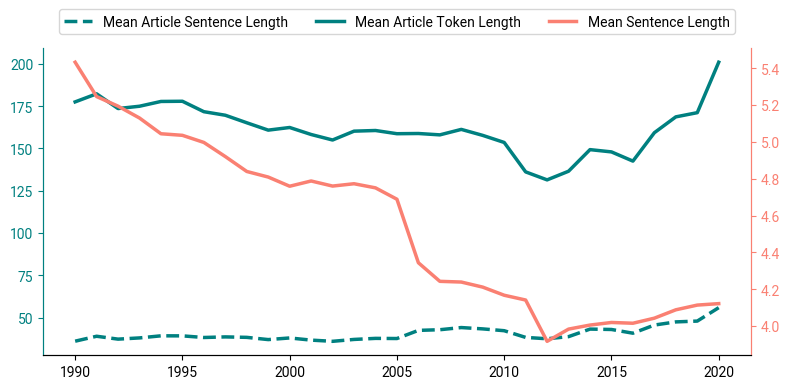

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax2 = ax.twinx()

# Plot the data and create labels for each plot
line1, = ax.plot(X, df.groupby('year')['s'].mean().tolist(), color='teal', linestyle='--', label="Mean Article Sentence Length",linewidth=2.5)
line2, = ax.plot(X, df.groupby('year')['len'].mean().tolist(), color='teal', label="Mean Article Token Length",linewidth=2.5)
line3, = ax2.plot(X, df.groupby('year')['len_s'].mean().tolist(), color='salmon', label='Mean Sentence Length',linewidth=2.5)

# Combine the handles and labels from both subplots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines += lines2
labels += labels2

# Create a legend for all lines
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Set spine colors according to line colors
ax.spines['left'].set_color('teal')
ax.spines['right'].set_color('salmon')
ax2.spines['left'].set_color('teal')
ax2.spines['right'].set_color('salmon')

# Set tick label and tick line colors
ax.tick_params(axis='y', colors='teal')
ax2.tick_params(axis='y', colors='salmon')
ax.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)

plt.tight_layout()
plt.savefig('figs/fig2b.pdf',bbox_inches='tight',dpi=400, transparent=True)

plt.show()